In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a dataset used to verify the validity o four KNN classifier

# Tools:
# 1. Randomizer
# 2. Mask

In [3]:
img = cv2.imread('images/cat.jpg')

print(f'image size: {img.shape}')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
lower_black = np.array([0,0,0], dtype=np.uint8)
upper_black = np.array([100,100,100], dtype=np.uint8)

# Create a mask. Threshold the HSV image to get only white colors
mask = cv2.inRange(hsv, lower_black, upper_black)
print(f'Binary mask shape: {mask.shape}')

# Bitwise-AND mask and original image
result = cv2.bitwise_and(img,img, mask= mask)

print(f'Colored mask shape: {result.shape}')

'''
# display the mask and masked image
cv2.imshow('Mask',mask)
cv2.waitKey(0)
#cv2.imshow('Masked Image',result)
#cv2.waitKey(0)
cv2.destroyAllWindows()
'''

image size: (427, 409, 3)
Binary mask shape: (427, 409)
Colored mask shape: (427, 409, 3)


"\n# display the mask and masked image\ncv2.imshow('Mask',mask)\ncv2.waitKey(0)\n#cv2.imshow('Masked Image',result)\n#cv2.waitKey(0)\ncv2.destroyAllWindows()\n"

In [4]:
gauss_noise=np.zeros(img.shape,dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)
img_2 = cv2.add(img, gauss_noise)

cv2.imshow('',img_2)
cv2.waitKey(0)

gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200)

contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 1. Filter the images matrix, find the indexes that gives True
fil_edge = edged.astype(bool)
indices = np.transpose(fil_edge.nonzero()) # Get non zero indices

print(indices.shape)

(18439, 2)


(2, 2635)
[[ 11  13  15 ... 426 426 426]
 [158 161 151 ... 339 371 400]]


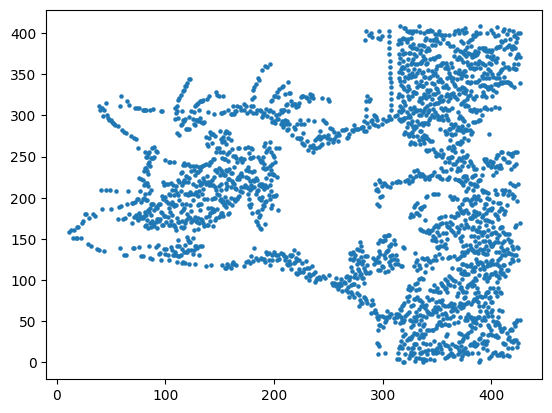

In [6]:
trans_indices = indices.T[:,::7]
print(trans_indices.shape)
print(trans_indices)
plt.scatter(trans_indices[0], trans_indices[1], s= 5)

In [7]:
data_points_bound_for_csv = trans_indices.T

data_points_bound_for_csv2 = np.append(data_points_bound_for_csv, np.zeros((len(data_points_bound_for_csv), 1), dtype=int), axis = 1)

df = pd.DataFrame(data_points_bound_for_csv)
df = pd.DataFrame(data_points_bound_for_csv2)
df

df.to_csv("cat_w_noise.csv", index=None, header = ['x', 'y', 'class'])